In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
DEFAULT_CRS = "EPSG:4326"

In [4]:
fcu_gpd = gpd.read_file("../../data/raw/poligonos_FCUs_shp")

In [5]:
fcu_gpd.head()

,cd_fcu,nm_fcu,cd_uf,nm_uf,sigla_uf,cd_mun,nm_mun,geometry
0,35503080069,Jardim Miliunas,35,São Paulo,SP,3550308,São Paulo,"POLYGON ((-46.37112 -23.50000, -46.37141 -23.5..."
1,42024040016,Rua Araranguá,42,Santa Catarina,SC,4202404,Blumenau,"POLYGON ((-49.05007 -26.93529, -49.05009 -26.9..."
2,33045570554,Tiqui,33,Rio de Janeiro,RJ,3304557,Rio de Janeiro,"POLYGON ((-43.48263 -22.88870, -43.48252 -22.8..."
3,33045570104,Parque Nossa Senhora da Penha,33,Rio de Janeiro,RJ,3304557,Rio de Janeiro,"POLYGON ((-43.21664 -22.87497, -43.21662 -22.8..."
4,35095020135,Núcleo Residencial Jardim das Andorinhas II,35,São Paulo,SP,3509502,Campinas,"POLYGON ((-47.01387 -22.91975, -47.01458 -22.9..."


In [8]:
fcu_gpd_sp = fcu_gpd[fcu_gpd["sigla_uf"] == "SP"]

In [9]:

hex_sp = gpd.read_file("../../data/shapeFiles/GRIDS_H3_SP_RES10") 


# Transform the CRS to EPSG:31983
hex_sp = hex_sp.to_crs(DEFAULT_CRS)
hex_sp.head()

,id_hex,geometry
0,8aa8100c3257fff,"POLYGON ((-46.63592 -23.53032, -46.63664 -23.5..."
1,8aa8100d2447fff,"POLYGON ((-46.53650 -23.53972, -46.53722 -23.5..."
2,8aa8100e1637fff,"POLYGON ((-46.66886 -23.59437, -46.66958 -23.5..."
3,8aa8100f0827fff,"POLYGON ((-46.59115 -23.61353, -46.59187 -23.6..."
4,8aa81010ec07fff,"POLYGON ((-46.65231 -23.83331, -46.65303 -23.8..."


In [10]:
if fcu_gpd_sp.crs != DEFAULT_CRS:
    fcu_gpd_sp = fcu_gpd_sp.to_crs(DEFAULT_CRS)
if hex_sp.crs != DEFAULT_CRS:
    hex_sp = hex_sp.to_crs(DEFAULT_CRS)

In [12]:
fcu_gpd_h3 =  fcu_gpd_sp.overlay(hex_sp[['id_hex', 'geometry']], how='intersection')


In [13]:
fcu_gpd_h3.head()

,cd_fcu,nm_fcu,cd_uf,nm_uf,sigla_uf,cd_mun,nm_mun,id_hex,geometry
0,35503080069,Jardim Miliunas,35,São Paulo,SP,3550308,São Paulo,8aa81044b667fff,"POLYGON ((-46.37065 -23.49904, -46.37032 -23.4..."
1,35503080069,Jardim Miliunas,35,São Paulo,SP,3550308,São Paulo,8aa81044b297fff,"POLYGON ((-46.37219 -23.49912, -46.37201 -23.4..."
2,35503080069,Jardim Miliunas,35,São Paulo,SP,3550308,São Paulo,8aa81044b747fff,"POLYGON ((-46.37017 -23.49990, -46.37043 -23.4..."
3,35503080069,Jardim Miliunas,35,São Paulo,SP,3550308,São Paulo,8aa81044b74ffff,"POLYGON ((-46.37132 -23.50007, -46.37160 -23.4..."
4,35503080069,Jardim Miliunas,35,São Paulo,SP,3550308,São Paulo,8aa81044b75ffff,"POLYGON ((-46.37015 -23.49910, -46.37015 -23.4..."


In [14]:
fcu_gpd_h3['intersec_geometry'] = fcu_gpd_h3.geometry

In [20]:
fcu_gpd_h3[fcu_gpd_h3['id_hex'] == '8aa81000e687fff']

,cd_fcu,nm_fcu,cd_uf,nm_uf,sigla_uf,cd_mun,nm_mun,id_hex,geometry,intersec_geometry,area_fcu
8544,35503081142,Totó,35,São Paulo,SP,3550308,São Paulo,8aa81000e687fff,"POLYGON ((-46.64720 -23.66696, -46.64698 -23.6...","POLYGON ((-46.64720 -23.66696, -46.64698 -23.6...",8258.899745


In [17]:
fcu_gpd_h3[fcu_gpd_h3['cd_fcu'] == '35503081142']

,cd_fcu,nm_fcu,cd_uf,nm_uf,sigla_uf,cd_mun,nm_mun,id_hex,geometry,intersec_geometry
8544,35503081142,Totó,35,São Paulo,SP,3550308,São Paulo,8aa81000e687fff,"POLYGON ((-46.64720 -23.66696, -46.64698 -23.6...","POLYGON ((-46.64720 -23.66696, -46.64698 -23.6..."
8545,35503081142,Totó,35,São Paulo,SP,3550308,São Paulo,8aa81000e68ffff,"POLYGON ((-46.64866 -23.66689, -46.64859 -23.6...","POLYGON ((-46.64866 -23.66689, -46.64859 -23.6..."
8546,35503081142,Totó,35,São Paulo,SP,3550308,São Paulo,8aa81000e69ffff,"MULTIPOLYGON (((-46.64700 -23.66693, -46.64698...","MULTIPOLYGON (((-46.64700 -23.66693, -46.64698..."
8547,35503081142,Totó,35,São Paulo,SP,3550308,São Paulo,8aa81000e6affff,"POLYGON ((-46.64824 -23.66762, -46.64837 -23.6...","POLYGON ((-46.64824 -23.66762, -46.64837 -23.6..."


In [18]:
fcu_gpd_h3['area_fcu'] = fcu_gpd_h3['intersec_geometry'].to_crs("EPSG:5641").area

In [25]:
area_fcu_agg = fcu_gpd_h3.groupby('id_hex')['area_fcu'].sum()
area_fcu_agg = area_fcu_agg.reset_index()

In [27]:
hex_favelas = hex_sp.join(area_fcu_agg.set_index('id_hex'), how='left', on='id_hex')
hex_favelas = gpd.GeoDataFrame(hex_favelas, crs=DEFAULT_CRS, geometry="geometry")

In [30]:
hex_favelas['area_hex'] = hex_favelas.geometry.to_crs("EPSG:5641").area
hex_favelas['prop_ocupado'] = hex_favelas['area_fcu']/hex_favelas['area_hex'] 
hex_favelas.head()

,id_hex,geometry,area_fcu,area_hex,prop_ocupado
0,8aa8100c3257fff,"POLYGON ((-46.63592 -23.53032, -46.63664 -23.5...",NaN,18002.590726,NaN
1,8aa8100d2447fff,"POLYGON ((-46.53650 -23.53972, -46.53722 -23.5...",NaN,18009.360752,NaN
2,8aa8100e1637fff,"POLYGON ((-46.66886 -23.59437, -46.66958 -23.5...",NaN,17997.005022,NaN
3,8aa8100f0827fff,"POLYGON ((-46.59115 -23.61353, -46.59187 -23.6...",18001.760632,18001.760632,1.0
4,8aa81010ec07fff,"POLYGON ((-46.65231 -23.83331, -46.65303 -23.8...",NaN,17986.265306,NaN


<Axes: ylabel='Frequency'>

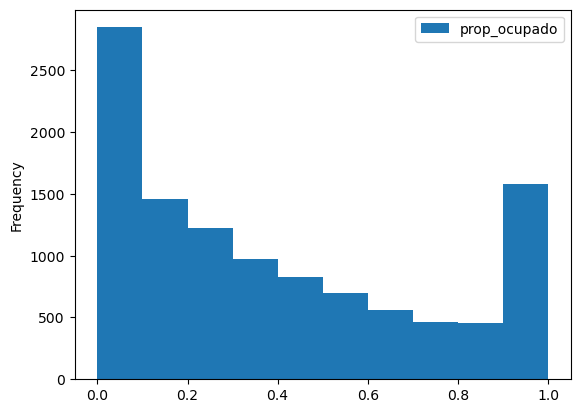

In [31]:
hex_favelas.plot.hist(column=['prop_ocupado'])

In [32]:
hex_favelas['is_fcu'] = hex_favelas['prop_ocupado'] > 0.5

<Axes: >

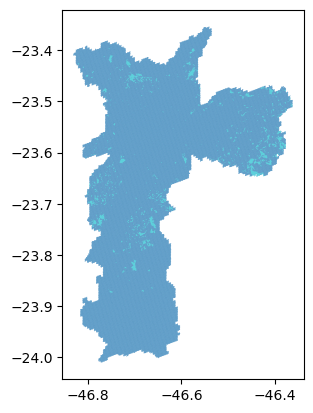

In [33]:
hex_favelas.plot(column='is_fcu', label=True)

In [36]:
hex_favelas.to_file("../../data/generated/WGS84_hex_fcu.gpkg", driver="GPKG")
